## XRD Data Analysis

### Overview

This Jupyter Notebook is created for the analysis of X-ray Diffraction (XRD) data in the field of material characterization. The data used in this analysis is sourced from my research work at IITM

#### Notebook Information

- **Creator:** Aman Kumar Shah
- **Date Created:** 30/12/2023
- **GitHub Repository:** [Analytical_Insights_with_Python-AIP](https://github.com/Amanshah383/Analytical_Insights_with_Python-AIP-)

#### Data Information

- **Data Source:** XRD_Sample_Data.txt
- **Format:** Text file (.txt)

### Analysis Steps

1. Data Loading and Exploration
2. Preprocessing
3. XRD Pattern Visualization
4. [Additional analysis steps]

#### Notes

- This notebook is intended for educational and analytical purposes.


1. **Data Loading and Exploration**

In [40]:
# Importing the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from peakdetect import peakdetect
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [23]:
# Loading the data to data frame
df = pd.read_csv("XRD_Sample_Data.txt", delimiter='\t', names=['2 theta', 'Intensity(a.u)'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2 theta         7501 non-null   float64
 1   Intensity(a.u)  7501 non-null   float64
dtypes: float64(2)
memory usage: 117.3 KB


In [24]:
df.head()

,2 theta,Intensity(a.u)
0,5.00,72059.2
1,5.01,72928.3
2,5.02,72520.0
3,5.03,72881.7
4,5.04,72706.7


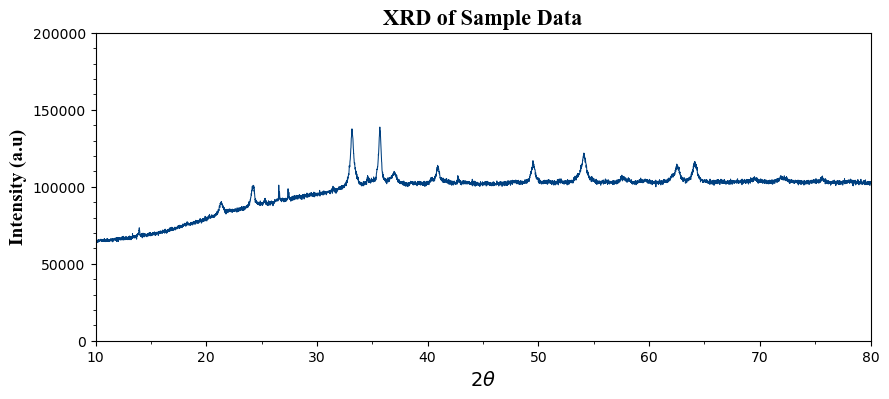

In [39]:
# Adjust the figsize to your desired dimensions
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df["2 theta"], df["Intensity(a.u)"], linestyle='-', color="#004080", linewidth = 0.75)
ax.set_xlim(10, 80)
ax.set_ylim(0, 200000)

# Set title and axis labels with custom font (Times New Roman)
font_properties_title = {'family': 'Times New Roman', 'size': 16, 'weight': 'bold'}
font_properties_axis = {'family': 'Times New Roman', 'size': 14, 'weight': 'bold'}

ax.set_title("XRD of Sample Data", fontdict=font_properties_title)
ax.set_xlabel(r'$2 \theta$', fontdict=font_properties_axis)
ax.set_ylabel('Intensity (a.u)', fontdict=font_properties_axis)

# Adjust major and minor ticks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(10))  
ax.xaxis.set_minor_locator(MultipleLocator(5)) 

# Adjust major and minor ticks on the y-axis
ax.yaxis.set_major_locator(MultipleLocator(50000))  
ax.yaxis.set_minor_locator(MultipleLocator(10000))  

plt.show()


Upper Peak Coordinates:
2 Theta: 13.95, Intensity: 73342.5
2 Theta: 21.37, Intensity: 90410.8
2 Theta: 24.24, Intensity: 100899.0
2 Theta: 26.55, Intensity: 101045.0
2 Theta: 27.39, Intensity: 98670.8
2 Theta: 33.17, Intensity: 137492.0
2 Theta: 35.68, Intensity: 138740.0
2 Theta: 36.97, Intensity: 109958.0
2 Theta: 40.9, Intensity: 113896.0
2 Theta: 42.75, Intensity: 106534.0
2 Theta: 49.51, Intensity: 116918.0
2 Theta: 54.11, Intensity: 121823.0
2 Theta: 57.54, Intensity: 107473.0
2 Theta: 62.5, Intensity: 114695.0
2 Theta: 64.11, Intensity: 116398.0
2 Theta: 71.89, Intensity: 107083.0
2 Theta: 75.66, Intensity: 106954.0


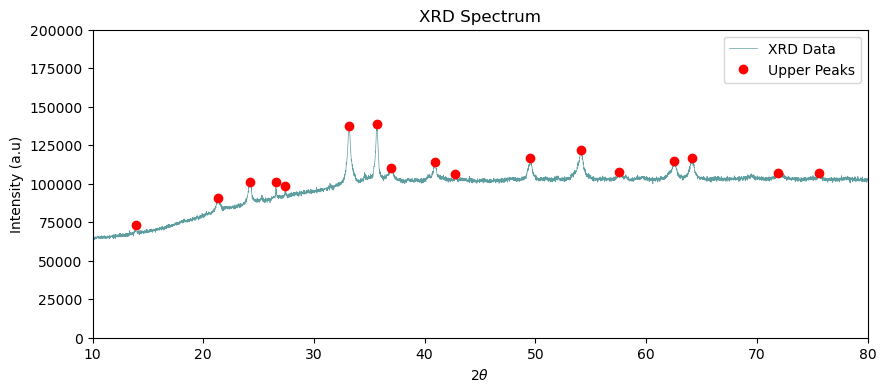

In [69]:

# Extract the intensity column from your XRD data
data = df["Intensity(a.u)"].values

# Detect peaks using peakdetect
peaks = peakdetect(data, lookahead=50, delta= 5000)
upper_peaks = np.array(peaks[0])  # Use the first array for upper peaks

# Print the coordinates of upper peaks
print("Upper Peak Coordinates:")
for coordinate in upper_peaks:
    theta, intensity = df.iloc[int(coordinate[0]), 0], coordinate[1]
    print(f"2 Theta: {theta}, Intensity: {intensity}")

# Plot the original XRD data
plt.plot(df["2 theta"], data, label='XRD Data', color='cadetblue', linestyle='-', linewidth=0.5)
plt.xlabel(r'$2 \theta$')
plt.ylabel('Intensity (a.u)')
plt.title('XRD Spectrum')
plt.xlim(10, 80)
plt.ylim(0, 200000)

# Plot upper peaks in red
plt.plot(df.iloc[upper_peaks[:, 0], 0], upper_peaks[:, 1], 'ro', label='Upper Peaks')

# Increase the width of the plot
plt.gcf().set_size_inches(10, 4)

# Add legend
plt.legend()

# Show the plot
plt.show()
